In [1]:
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

# 1. Data Summary

First, we import the data set and take a look at it

In [7]:
house_df = pd.read_csv('data/ready_to_use_dataset.csv')
house_df = house_df.drop_duplicates(['year', 'state', 'district', 'name'])
display(house_df.shape)

(9974, 20)

In [8]:
display(house_df.dtypes)

district                               object
is_incumbent                          float64
name                                   object
party                                  object
percent                               float64
state                                  object
votes                                 float64
won                                     int64
year                                    int64
first_time_elected                    float64
count_victories                         int64
unemployement_rate                    float64
is_presidential_year                  float64
president_can_be_re_elected           float64
president_party                        object
president_overall_avg_job_approval    float64
last_D_house_seats                    float64
last_R_house_seats                    float64
last_house_majority                    object
fundraising                           float64
dtype: object

In [9]:
display(house_df.head())

,district,is_incumbent,name,party,percent,state,votes,won,year,first_time_elected,count_victories,unemployement_rate,is_presidential_year,president_can_be_re_elected,president_party,president_overall_avg_job_approval,last_D_house_seats,last_R_house_seats,last_house_majority,fundraising
0,District 1,0.0,Ratliff Boon,D,42.1,Indiana,4281.0,1,1824,1824.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,District 1,1.0,Ratliff Boon,D,42.8,Indiana,5202.0,1,1826,1824.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,District 1,1.0,Ratliff Boon,D,52.2,Indiana,7272.0,1,1828,1824.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,District 1,0.0,John Law,D,49.1,Indiana,10868.0,0,1830,1860.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,District 1,1.0,Ratliff Boon,D,50.9,Indiana,11280.0,1,1830,1824.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
display(house_df.describe())

,is_incumbent,percent,votes,won,year,first_time_elected,count_victories,unemployement_rate,is_presidential_year,president_can_be_re_elected,president_overall_avg_job_approval,last_D_house_seats,last_R_house_seats,fundraising
count,9862.000000,9959.000000,9907.000000,9974.000000,9974.000000,5529.000000,9974.000000,8995.000000,9872.000000,9872.000000,8914.000000,9872.000000,9872.000000,2.802000e+03
mean,0.445853,50.950784,101055.098819,0.528474,1991.993884,1987.076867,0.963305,6.193385,0.486224,0.599980,0.489771,219.553485,210.795583,1.032118e+06
std,0.497085,19.859065,55210.348686,0.499214,31.278231,32.717187,1.826929,2.164622,0.499835,0.489927,0.064796,36.293795,34.769987,1.454690e+06
min,0.000000,0.000000,0.000000,0.000000,1824.000000,1824.000000,0.000000,2.700000,0.000000,0.000000,0.395000,38.000000,86.000000,-3.469651e+04
25%,0.000000,36.170000,59087.000000,0.000000,1982.000000,1974.000000,0.000000,4.500000,0.000000,0.000000,0.480000,194.000000,180.000000,7.217875e+04
50%,0.000000,50.230000,94704.000000,1.000000,2004.000000,2002.000000,0.000000,5.700000,0.000000,1.000000,0.480000,205.000000,228.000000,7.825413e+05
75%,1.000000,64.300000,136582.000000,1.000000,2012.000000,2012.000000,1.000000,7.300000,1.000000,1.000000,0.494000,253.000000,241.000000,1.443633e+06
max,1.000000,100.000000,322514.000000,1.000000,2018.000000,2018.000000,17.000000,19.000000,1.000000,1.000000,0.701000,334.000000,303.000000,3.410465e+07


In [33]:
#get columns with NaN data
house_df.isna().sum()

district                                 0
is_incumbent                           112
name                                     0
party                                    0
percent                                 15
state                                    0
votes                                   67
won                                      0
year                                     0
first_time_elected                    4445
count_victories                          0
unemployement_rate                     979
is_presidential_year                   102
president_can_be_re_elected            102
president_party                        102
president_overall_avg_job_approval    1060
last_D_house_seats                     102
last_R_house_seats                     102
last_house_majority                    102
fundraising                           7172
dtype: int64

In [34]:
#get rid of NaNs
def clean_nan(data):
    
    #iterate over all data and replace NaN
    for i in range(data.shape[0]):
        
        #selections used below
        dist_state = data[(data.district == data.district.iloc[i]) & 
                          (data.state == data.state.iloc[i])]
        dist_state_year = data[(data.district == data.district.iloc[i]) & 
                               (data.state == data.state.iloc[i]) & 
                               (data.year == data.year.iloc[i])]
        
        #votes NaN will be replaced with mean of votes from state and district
        if np.isnan(data.votes.iloc[i]):
            data.votes.iloc[i] = dist_state.votes.mean()
            
        #is_incumbent NaN will be replaced: if sum of is_incumbent for state/district/year > 0 then assign 0. Else 1
        if np.isnan(data.is_incumbent.iloc[i]):
            if dist_state_year.is_incumbent.sum() > 0:
                data.is_incumbent.iloc[i] = 0
            else:
                data.is_incumbent.iloc[i] = 1
                
        #Percent: calculate based on percent per state/district/year and subtract from 100
        if np.isnan(data.percent.iloc[i]):
            data.percent.iloc[i] = 100 - dist_state_year.percent.sum()
            
        #first_time_elected: take from year if won=1 else 0
        if np.isnan(data.first_time_elected.iloc[i]):
            if data.won.iloc[i] == 1:
                data.first_time_elected.iloc[i] = data.year.iloc[i]
            else:
                data.first_time_elected.iloc[i] = 0
                
        #unemployement_rate: set to 0
        if np.isnan(data.unemployement_rate.iloc[i]):
            data.unemployement_rate.iloc[i] = 0
            
        #is_presidential_year: set to 0
        if np.isnan(data.is_presidential_year.iloc[i]):
            data.is_presidential_year.iloc[i] = 0            

        #president_can_be_re_elected: set to 1
        if np.isnan(data.president_can_be_re_elected.iloc[i]):
            data.president_can_be_re_elected.iloc[i] = 1

        #president_party: set to 0
        if pd.isnull(data.president_party.iloc[i]):
            data.president_party.iloc[i] = 0
            
        #president_overall_avg_job_approval: mean for state/district
        if np.isnan(data.president_overall_avg_job_approval.iloc[i]):
                data.president_overall_avg_job_approval.iloc[i] = dist_state.president_overall_avg_job_approval.mean()
            
        #last_D_house_seats: mean for state/district
        if np.isnan(data.last_D_house_seats.iloc[i]):
            data.last_D_house_seats.iloc[i] = dist_state.last_D_house_seats.mean()  
            
        #last_R_house_seats: mean for state/district
        if np.isnan(data.last_R_house_seats.iloc[i]):
            data.last_R_house_seats.iloc[i] = dist_state.last_R_house_seats.mean() 

        #last_house_majority: most occurence for state/district
        if pd.isnull(data.last_house_majority.iloc[i]):
            data.last_house_majority.iloc[i] = max(dist_state.last_house_majority.iteritems())

        #fundraising: mean for state/district
        if np.isnan(data.fundraising.iloc[i]):
            data.fundraising.iloc[i] = dist_state.fundraising.mean() 
        
            
    data['votes'] = pd.to_numeric(data['votes']).round(0).astype(int)

    return data

In [ ]:
#clean orignal dataset nan_df
house_df_df = clean_nan(house_df)

In [11]:
print(len(house_df))

9974


Our dataset has 9974 observations and 20 predictors. 

In [12]:
msk=(house_df['year']==1972) & (house_df['state']=='Minnesota') & (house_df['district']=='District 6')
house_df[msk]

,district,is_incumbent,name,party,percent,state,votes,won,year,first_time_elected,count_victories,unemployement_rate,is_presidential_year,president_can_be_re_elected,president_party,president_overall_avg_job_approval,last_D_house_seats,last_R_house_seats,last_house_majority,fundraising
1865,District 6,1.0,John M. Zwach,R,NaN,Minnesota,114537.0,0,1972,NaN,0,5.6,1.0,0.0,R,0.49,255.0,180.0,D,NaN
9957,District 6,0.0,Rick Nolan,D,NaN,Minnesota,109955.0,1,1972,NaN,0,5.6,1.0,0.0,R,0.49,255.0,180.0,D,NaN


In [13]:
#check that we always have one (and only one) winner per district
house_df_grouped=house_df.groupby(['year', 'state', 'district'])['won'].sum().reset_index(drop=False)
house_df_grouped[house_df_grouped['won']!=1]

,year,state,district,won


In [14]:
#show that we have to remove first_time_elected if it's in the future, compared to current observation
house_df[(house_df['year']-house_df['first_time_elected']<=0)&(house_df['name']=='John Law')]

,district,is_incumbent,name,party,percent,state,votes,won,year,first_time_elected,count_victories,unemployement_rate,is_presidential_year,president_can_be_re_elected,president_party,president_overall_avg_job_approval,last_D_house_seats,last_R_house_seats,last_house_majority,fundraising
3,District 1,0.0,John Law,D,49.1,Indiana,10868.0,0,1830,1860.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,District 1,0.0,John Law,D,55.7,Indiana,13476.0,1,1860,1860.0,0,NaN,1.0,1.0,R,NaN,98.0,116.0,R,NaN


C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


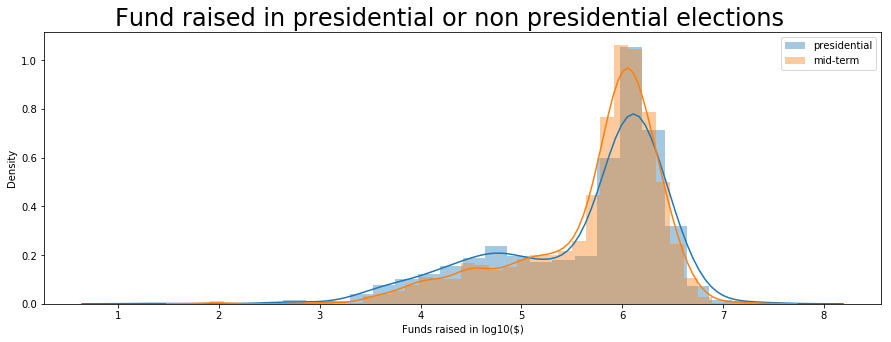

In [15]:
#fundraising
def fundraisingVsPresidentialYear(df):
    df_plt=df.dropna(subset=['fundraising', 'is_presidential_year']).copy()
    #df_plt.loc[df_plt['fundraising']<=0, 'fundraising']=1 #remove zero values
    df_plt=df_plt[df_plt['fundraising']>0]
    df_plt['fundraising']=np.log10(df_plt['fundraising']) #take the log10
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    fig.suptitle('Fund raised in presidential or non presidential elections', fontsize=24, y=0.95)
    #print(i, year)
    sns.distplot(df_plt[df_plt['is_presidential_year']==1]['fundraising'], ax=ax, label='presidential')
    sns.distplot(df_plt[df_plt['is_presidential_year']==0]['fundraising'], ax=ax, label='mid-term')
    #set x label
    ax.set_xlabel('Funds raised in log10($)')
    #set y label
    ax.set_ylabel('Density')
    #set title
    #ax[i].set_title('year {}'.format(year))
    #set legend
    ax.legend()
fundraisingVsPresidentialYear(house_df)

In [16]:
house_df_district_count=house_df.loc[house_df['year']==2017]
house_df_district_count.groupby(['state', 'district'])['name'].first()

house_df[(house_df['state']=='California')&(house_df['district']=='District 34')&(house_df['year']==2017)]

,district,is_incumbent,name,party,percent,state,votes,won,year,first_time_elected,count_victories,unemployement_rate,is_presidential_year,president_can_be_re_elected,president_party,president_overall_avg_job_approval,last_D_house_seats,last_R_house_seats,last_house_majority,fundraising
9122,District 34,0.0,Robert Lee Ahn,D,40.8,California,17610.0,0,2017,NaN,0,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1658443.92
9126,District 34,0.0,Jimmy Gomez,D,59.2,California,25569.0,1,2017,2017.0,0,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1379556.75


In [17]:
#count how many observations we have for each district. 
house_df_grouped=house_df[house_df['year']!=2018].groupby(['state', 'district'])['party'].count()
house_df_grouped.reset_index(drop=False).head()

,state,district,party
0,Alabama,District 1,12
1,Alabama,District 2,16
2,Alabama,District 3,16
3,Alabama,District 4,12
4,Alabama,District 5,14


In [18]:
#wonParty=house_df[house_df['won']>0.5][['year','state', 'district', 'party']]
#wonParty=wonParty.rename(index=str, columns={"party": "wonParty"})
#house_df2=house_df.join(wonParty.set_index(['year', 'state', 'district']), on=['year', 'state', 'district'])
house_df2=house_df.copy()
house_df2['R_vs_D_Seats']=house_df2['last_R_house_seats']/(house_df2['last_R_house_seats']+house_df2['last_D_house_seats']) #1=100% R, 0=100% D
house_df2['WinLoseParty']=house_df2['party'].astype(str)+house_df2['won'].replace([0, 1], ['Loser', 'Winner'])
house_df2['won']=house_df2['won'].replace([0, 1], ['Loser', 'Winner'])
house_df2['LogFundraising']=house_df2['fundraising'].copy()
house_df2.loc[house_df2['LogFundraising']<=0, 'LogFundraising']=np.NaN
house_df2['LogFundraising']=np.log10(house_df2['LogFundraising']) #take the log10
#df['Year'].astype(str) + df['quarter']
house_df2.head()

,district,is_incumbent,name,party,percent,state,votes,won,year,first_time_elected,...,president_can_be_re_elected,president_party,president_overall_avg_job_approval,last_D_house_seats,last_R_house_seats,last_house_majority,fundraising,R_vs_D_Seats,WinLoseParty,LogFundraising
0,District 1,0.0,Ratliff Boon,D,42.1,Indiana,4281.0,Winner,1824,1824.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DWinner,NaN
1,District 1,1.0,Ratliff Boon,D,42.8,Indiana,5202.0,Winner,1826,1824.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DWinner,NaN
2,District 1,1.0,Ratliff Boon,D,52.2,Indiana,7272.0,Winner,1828,1824.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DWinner,NaN
3,District 1,0.0,John Law,D,49.1,Indiana,10868.0,Loser,1830,1860.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DLoser,NaN
4,District 1,1.0,Ratliff Boon,D,50.9,Indiana,11280.0,Winner,1830,1824.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DWinner,NaN


In [19]:
#palettes for parties or other
Parties_palette=[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
             (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
             (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
             (1.0, 0.4980392156862745, 0.054901960784313725),
             (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
             (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
             (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
             (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
             (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
             (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]
WinLosePalette=[(0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
             (1.0, 0.4980392156862745, 0.054901960784313725),
             (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
             (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
             (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
             (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
             (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
             (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


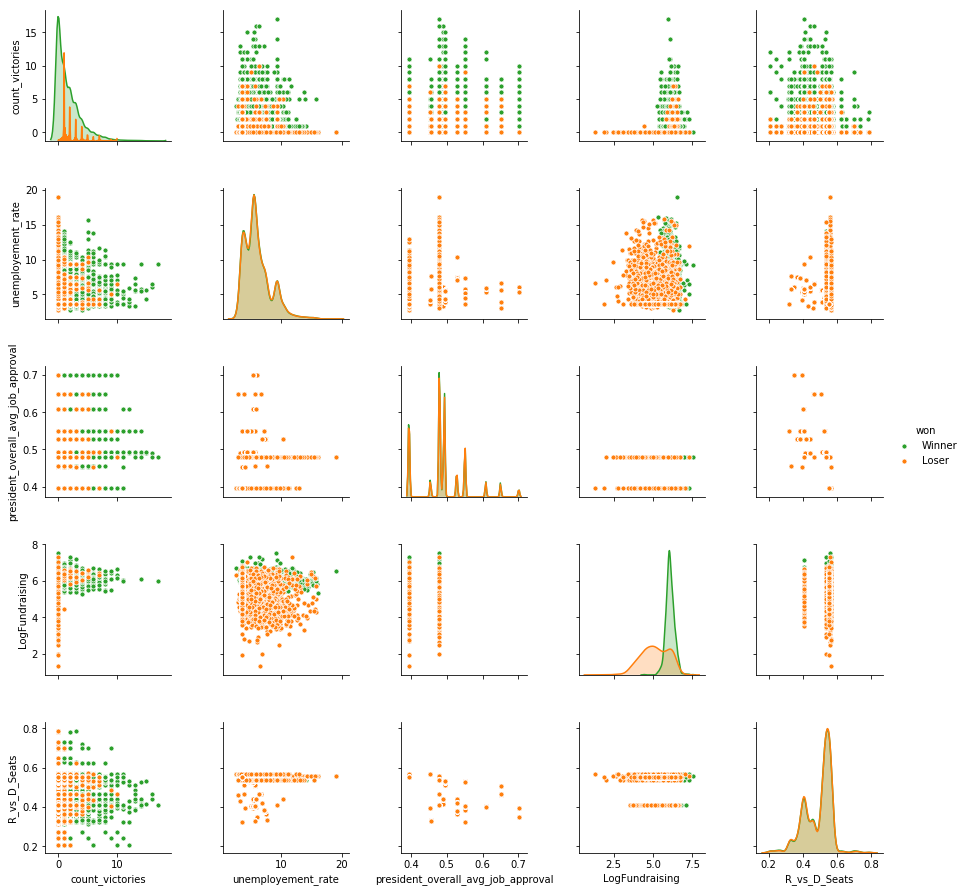

In [20]:
sns.pairplot(house_df2[[
 'party',
 'count_victories',
 'unemployement_rate',
 'president_party',
 'president_overall_avg_job_approval',
 'last_house_majority',
 'LogFundraising',
 #'WinLoseParty',
 #'wonParty',
 'R_vs_D_Seats',
 'won']], hue="won",  palette=WinLosePalette, plot_kws=dict(s=25))

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


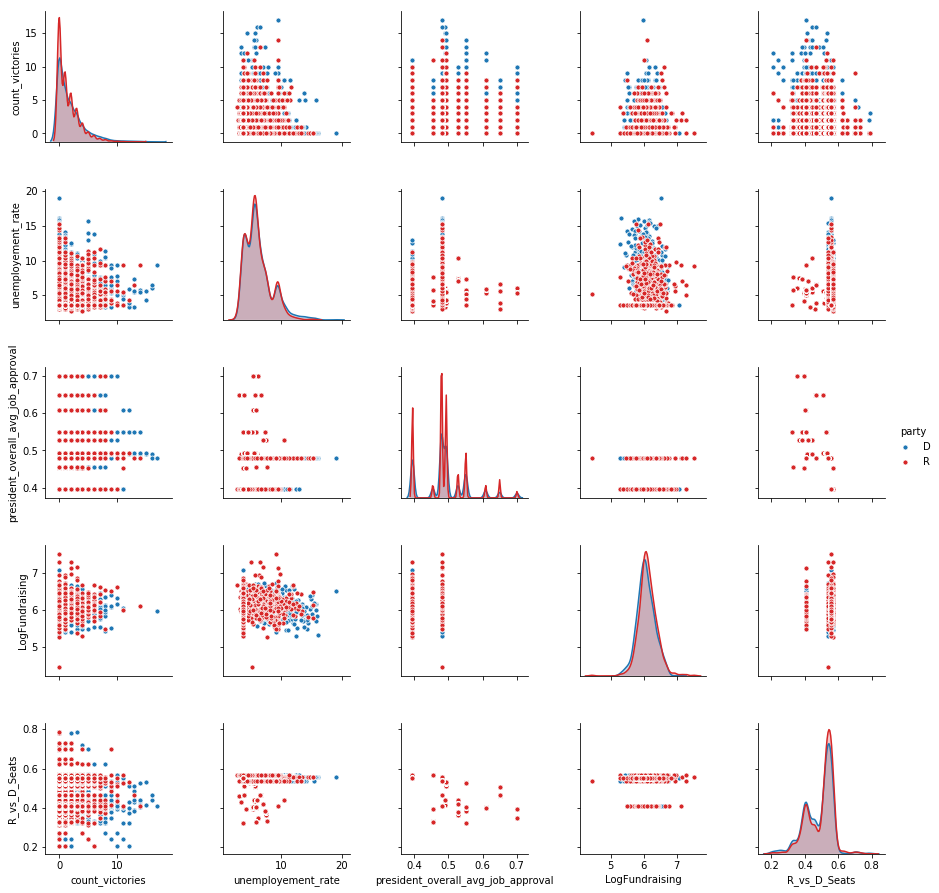

In [21]:
sns.pairplot(house_df2[house_df2['won']=='Winner'][[
 'party',
 'count_victories',
 'unemployement_rate',
 'president_party',
 'president_overall_avg_job_approval',
 'last_house_majority',
 'LogFundraising',
 #'WinLoseParty',
 #'wonParty',
 'R_vs_D_Seats',
 'won']], hue="party",  palette=Parties_palette, plot_kws=dict(s=25))

In [22]:
#house_df2=house_df.set_index(['year', 'state', 'district', 'name']).dropna().copy()
house_df2=house_df.dropna().copy()
house_df2_districts=house_df2[['state','district']]
house_df2=house_df2.drop('state', axis=1).drop('district', axis=1).drop('name', axis=1)
house_df2['party']=house_df2['party'].replace(['D', 'R'], [0, 1])
house_df2['president_party']=house_df2['president_party'].replace(['D', 'R'], [0, 1])
house_df2['last_house_majority']=house_df2['last_house_majority'].replace(['D', 'R'], [0, 1])

data_train, data_test=house_df2[house_df2['year']!=2018], house_df2[house_df2['year']==2018]

x_train, y_train=data_train.drop('won', axis=1), data_train['won']

x_test, y_test=data_test.drop('won', axis=1), data_test['won']
baselineLogRegr=LogisticRegressionCV(cv=5, penalty='l2').fit(x_train, y_train)

In [23]:
#Accuracy is defined as (TP+TN)/n
def printAccuracy(y_train, y_pred_train, y_test, y_pred_test):
    print('Training Set Accuracy: \t{:.2%}'.format(np.sum(y_train == y_pred_train) / len(y_train)))
    print('Test Set Accuracy: \t{:.2%}'.format(np.sum(y_test == y_pred_test) / len(y_test)))

y_pred_train=baselineLogRegr.predict(x_train)
y_pred_test=baselineLogRegr.predict(x_test)
printAccuracy(y_train, y_pred_train, y_test, y_pred_test)
print('Amount of districts in the predictions: {:.1%} of the total'.format(len(x_test.join(house_df2_districts).groupby(['state', 'district']).count())/435))

Training Set Accuracy: 	96.15%
Test Set Accuracy: 	94.12%
Amount of districts in the predictions: 67.1% of the total


In [24]:
#Baseline model 
def winnerFilter(df):
    return df[df['won']==1][['state', 'district','party']]
    
def baselineTrain(df):
    df_grouped=df[df['won']==1 ].groupby(['state', 'district', 'party'])['won'].count().reset_index(drop=False)
    df_grouped=df_grouped.groupby(['state', 'district']).agg({'won':'max',      
                                         'party': 'first'})
    return df_grouped.drop('won', axis=1).reset_index(drop=False)

In [25]:
y_pred=baselineTrain(house_df[house_df['year']!=2018]) #train simple average model, remove 2018 results
y=winnerFilter(house_df[house_df['year']==2018]) #extract winner party for each district in 2018

results=[]
for state in y['state'].unique():
    for district in y[y['state']==state]['district']:
        actual=y.loc[(y['state']==state)&(y['district']==district), 'party']
        pred=y_pred.loc[(y_pred['state']==state)&(y_pred['district']==district), 'party']
        #print('pred:{}, \nactual:{}, \npred.all():{}, \nactual.all():{}\n result:{}\n'.format(pred, actual, pred.all(), actual.all(), actual.all()==pred.all()))
        results.append(actual.all()==pred.all())
print('Test Set Accuracy: \t{:.2%}'.format(sum(results)/len(results)))

Test Set Accuracy: 	77.93%


In [26]:
def deductPartisanship(trainData, HistYears=50):
    #compute the prevalence of one party win against the other
    house_df_all_districts=trainData[(trainData['won']==1) & (trainData['year']>=(2018-HistYears)) & (trainData['year']!=2018)].groupby(['state', 'district'])['party'].sum().reset_index(drop=False)
    house_df_all_districts['R_occurence']=house_df_all_districts['party'].str.count('R')/house_df_all_districts['party'].str.len()

    avgHistData=house_df_all_districts['party'].str.len().mean() #Average amount of historical data per district
    histDataThreshold=avgHistData/2

    print('In average, in the last {} years, we have data from the last {:.1f} elections in each district.\nSome districts are "new" as they exist only after a redistribution for a new congress. \nWe evaluate the partisanships of districts which exist at least since the last {:.1f} elections'.format(HistYears, avgHistData, histDataThreshold))

    #3=traditionally Republican district
    #2=traditionally Democratic district
    #1=swing district
    #0=Recent district (Not enough historical data)
    house_df_all_districts['partisanship']=(house_df_all_districts['party'].str.len()>=histDataThreshold)*(
                      (house_df_all_districts['R_occurence']>(2/3))*3
                    + (house_df_all_districts['R_occurence']<=(1/3))*2
                    + ((house_df_all_districts['R_occurence']>(1/3))
                      &(house_df_all_districts['R_occurence']<=(2/3)))*1
                    )
    return house_df_all_districts[['state', 'district', 'partisanship']]

def assignPartisanship(train_df, test_df):
    return test_df.join(deductPartisanship(train_df).set_index(['state', 'district']), on=['state', 'district'])


In [27]:
def preprocess(train_df, df):
    out_df=assignPartisanship(train_df, df).copy()
    out_df['first_time_elected']=out_df['year']-out_df['first_time_elected']
    out_df.loc[out_df['first_time_elected']<0, 'first_time_elected']=np.NaN
    out_df['Log10fundraising']=out_df['fundraising']
    out_df.loc[out_df['Log10fundraising']<=0, 'Log10fundraising']=np.NaN
    out_df['Log10fundraising']=np.log10(out_df['fundraising']) #take the log10
    return out_df[['is_incumbent',
                   'party', 
                   'first_time_elected', 
                   'count_victories', 
                   'unemployement_rate', 
                   'is_presidential_year',
                   'president_can_be_re_elected',
                   'president_party',
                   'president_overall_avg_job_approval',
                   'last_D_house_seats',
                   'last_R_house_seats',
                   'last_house_majority',
                   'fundraising',
                   'won'
                  ]]

msk=house_df['year']!=2018
data_train=preprocess(house_df[msk], house_df[msk])
data_test=preprocess(house_df[msk], house_df[~msk])

In average, in the last 50 years, we have data from the last 9.0 elections in each district.
Some districts are "new" as they exist only after a redistribution for a new congress. 
We evaluate the partisanships of districts which exist at least since the last 4.5 elections
In average, in the last 50 years, we have data from the last 9.0 elections in each district.
Some districts are "new" as they exist only after a redistribution for a new congress. 
We evaluate the partisanships of districts which exist at least since the last 4.5 elections


C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


In [28]:
# table with all correlations for Republicans win
drop = ['won','votes', 'percent', 'year', 'first_time_elected', 'is_presidential_year', 'last_D_house_seats', 'last_R_house_seats','president_can_be_re_elected']
corr_df = house_df2.copy()
corr_df = corr_df.drop(drop, axis=1)
corr_df[corr_df['party'] == 1].corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,is_incumbent,party,count_victories,unemployement_rate,president_party,president_overall_avg_job_approval,last_house_majority,fundraising
is_incumbent,1.0,nan,0.38,-0.11,0.14,-0.14,0.16,0.044
party,nan,nan,nan,nan,nan,nan,nan,nan
count_victories,0.38,nan,1.0,-0.18,0.18,-0.18,-0.13,-0.02
unemployement_rate,-0.11,nan,-0.18,1.0,-0.69,0.69,-0.44,-0.005
president_party,0.14,nan,0.18,-0.69,1.0,-1.0,0.33,-0.00056
president_overall_avg_job_approval,-0.14,nan,-0.18,0.69,-1.0,1.0,-0.33,0.00056
last_house_majority,0.16,nan,-0.13,-0.44,0.33,-0.33,1.0,0.056
fundraising,0.044,nan,-0.02,-0.005,-0.00056,0.00056,0.056,1.0


In [29]:
# table with all correlations for Democrats win
corr_df[corr_df['party'] == 0].corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,is_incumbent,party,count_victories,unemployement_rate,president_party,president_overall_avg_job_approval,last_house_majority,fundraising
is_incumbent,1.0,nan,0.35,0.056,-0.037,0.037,-0.083,-0.16
party,nan,nan,nan,nan,nan,nan,nan,nan
count_victories,0.35,nan,1.0,-0.093,0.081,-0.081,-0.34,-0.1
unemployement_rate,0.056,nan,-0.093,1.0,-0.71,0.71,-0.26,-0.04
president_party,-0.037,nan,0.081,-0.71,1.0,-1.0,0.37,-0.062
president_overall_avg_job_approval,0.037,nan,-0.081,0.71,-1.0,1.0,-0.37,0.062
last_house_majority,-0.083,nan,-0.34,-0.26,0.37,-0.37,1.0,-0.0096
fundraising,-0.16,nan,-0.1,-0.04,-0.062,0.062,-0.0096,1.0


In [30]:
var_all = ['last_house_majority','is_incumbent', 'count_victories','unemployement_rate', 'president_overall_avg_job_approval','fundraising']
# comparison of variables with boxplots
def expl_boxplots(dataframe,variables):
    house_df2_D = house_df2[house_df2['party'] == 0]
    house_df2_R = house_df2[house_df2['party'] == 1]
    fig = plt.figure(figsize=(10,6))
    for i in range(len(var_all)):
        plt.subplot(2,3,i+1)
        a = pd.DataFrame({ 'group' : np.repeat('Democrat',house_df2_D.shape[0]), 'value': house_df2_D[var_all[i]] })
        b = pd.DataFrame({ 'group' : np.repeat('Republican',house_df2_R.shape[0]), 'value': house_df2_R[var_all[i]] })
        plt.title(var_all[i])
        df=a.append(b)
        # Usual boxplot
        sns.boxplot(x='group', y='value', data=df)
    fig
    plt.tight_layout()

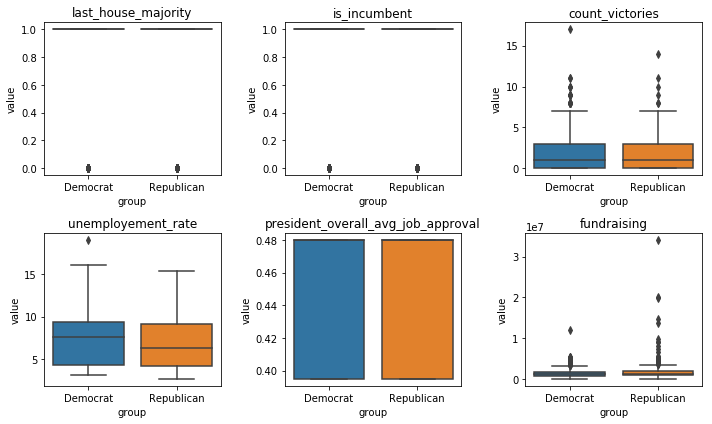

In [31]:
expl_boxplots(house_df2,var_all)